# Простая линейная регрессия 



Импортируем необходимые библиотеки.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Загружаем данные.

In [7]:
data = pd.read_csv(r'/content/drive/MyDrive/лекция линейная регрессия/Salary.csv')


In [8]:
data.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


Построим линейный график по нашим данным. 

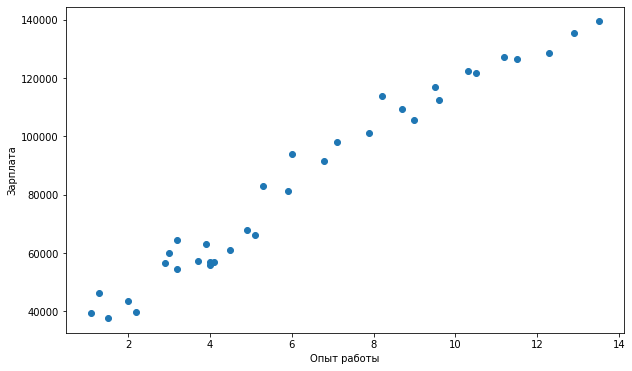

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(data['YearsExperience'], data['Salary'])
plt.xlabel('Опыт работы')
plt.ylabel('Зарплата')
plt.show()

In [10]:
X = data[['YearsExperience']]
y = data[['Salary']]

Разделяем выборку на трейновую и тестовую.

In [11]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [12]:
model=LinearRegression()

In [13]:
model=model.fit(X_train, y_train)

Предсказываем значения у.

In [14]:
y_pred=model.predict(X_test)

Коэффициент. Угол наклона прямой.

In [15]:
model.coef_

array([[8681.00673757]])

Смещение прямой.

In [16]:
model.intercept_

array([29696.00122501])

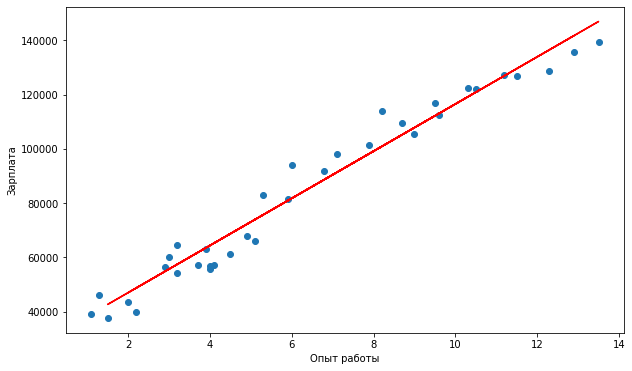

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(X, y)
plt.plot(X_train, model.predict(X_train), color='red')
plt.xlabel('Опыт работы')
plt.ylabel('Зарплата')
plt.show()

Посмотрим качество модели. Используем метрику R^2

In [18]:
model.score(X_test, y_test)

0.949370190282387

Зарплата с опытом работы 1 год.

In [19]:
model.predict([[1]])

array([[38377.00796258]])

# Мультилинейная регрессия

**Импортирум библиотеки.**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Импортируем бостонский датасет.**

In [21]:
boston_dataset = load_boston()

In [22]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [23]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [24]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [25]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [26]:
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

**Объединяем данные в один датафрэйм.**

In [ ]:
data=pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
data['PRICE']=boston_dataset.target

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Ищем пропущенные значения.**

In [ ]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

Все данные присутствуют.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Все параметры типа float - это нам и нужно.

**Построим графики.**

Гистограмма распредления цен.

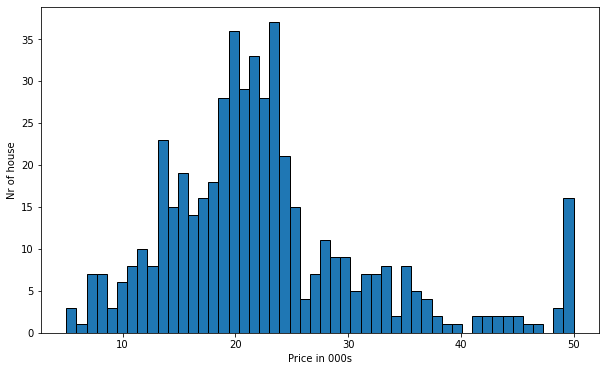

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'], bins=50, ec='black')
plt.xlabel('Price in 000s')
plt.ylabel('Nr of house')
plt.show()

Среднее количество комнат.

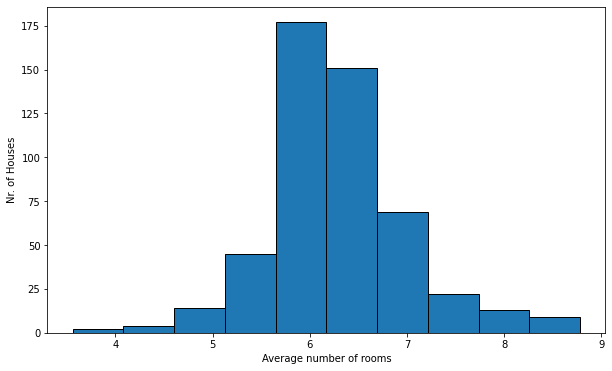

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'], ec='black')
plt.xlabel('Average number of rooms')
plt.ylabel('Nr. of Houses')
plt.show()

Индекс доступности к метро.

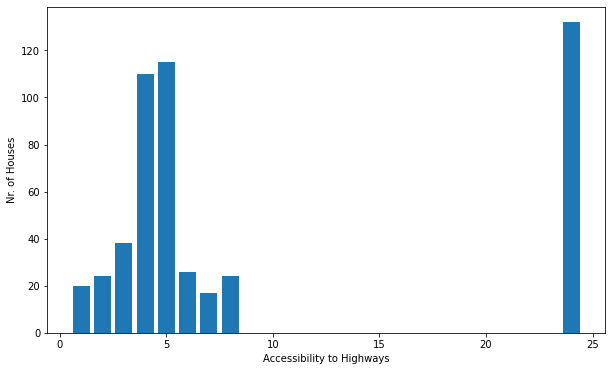

In [ ]:
frequency = data['RAD'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(frequency.index, height=frequency)
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

Статистические параметры всех параметров.

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Корреляции.**




In [ ]:
data['PRICE'].corr(data['RM'])

0.6953599470715393

In [ ]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375616

Карта корреляции.

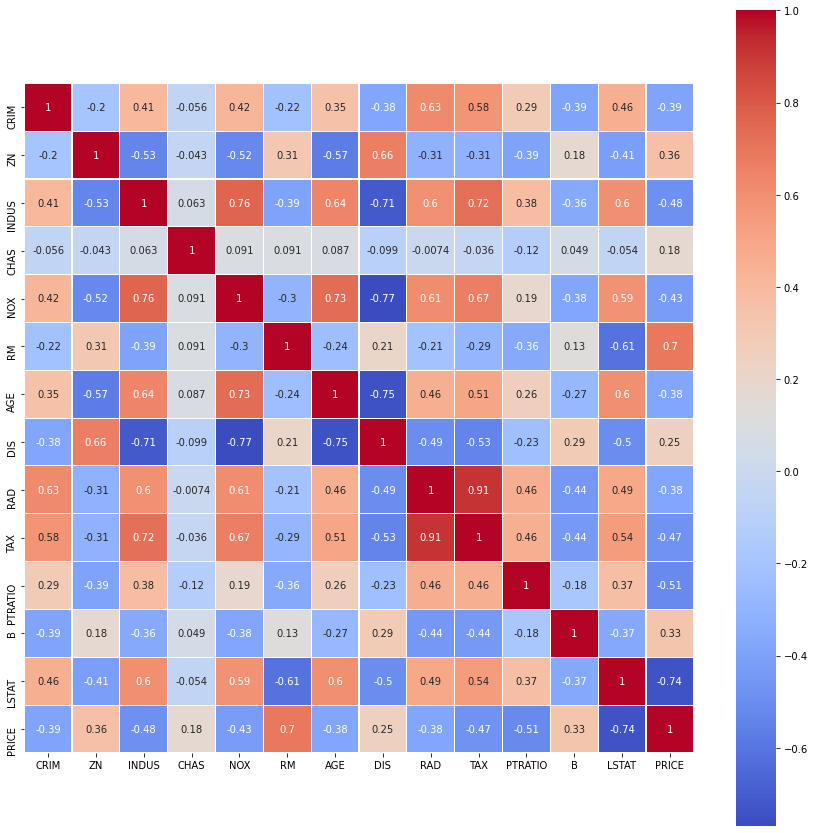

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, linewidths=.1, cmap="coolwarm", square=True)

Корреляция количества комнат с ценой.

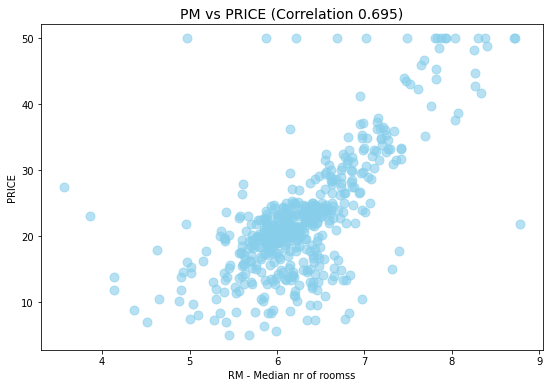

In [ ]:
rm_tgt_corr = round(data['RM'].corr(data['PRICE']), 3)
plt.figure(figsize=(9,6))
plt.scatter(x=data['RM'],y=data['PRICE'], alpha=0.6, s=80, color='skyblue')
plt.title(f'PM vs PRICE (Correlation {rm_tgt_corr})', fontsize=14)
plt.xlabel('RM - Median nr of roomss')
plt.ylabel('PRICE')
plt.show()

Направление корреляции.

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


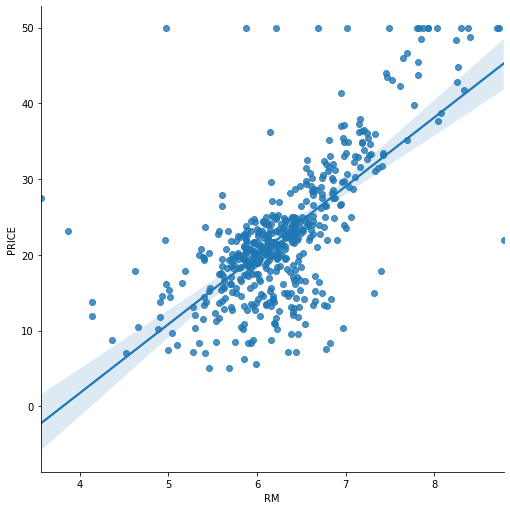

In [ ]:
sns.lmplot(x='RM', y="PRICE", data=data, size=7)
plt.show()

**Обучение модели.**

In [ ]:
prices=data['PRICE']
features=data.drop('PRICE', axis=1)
X_train, X_test,y_train,y_test=train_test_split(features,prices,test_size=0.2,random_state=2)

In [ ]:
regr=LinearRegression()
regr.fit(X_train, y_train)
print('Training data R^2:', regr.score(X_train, y_train))
print('Testing data R^2:', regr.score(X_test, y_test))
print('Intercept:', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data R^2: 0.7285831776605591
Testing data R^2: 0.7789207451814417
Intercept: 37.19980774264986


,coef
CRIM,-0.108224
ZN,0.038904
INDUS,-0.015152
CHAS,3.158979
NOX,-16.585407
RM,3.632885
AGE,0.009351
DIS,-1.386182
RAD,0.324066
TAX,-0.011625


Определяем смещение данных.

In [ ]:
data['PRICE'].skew()

1.1080984082549072

Переведем все цены в логарифмы. Это все большие значения нивелированы логарифмами.

In [ ]:
y_log=np.log(data['PRICE'])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

Стало ближе к нормальному распределению.

In [ ]:
y_log.skew()

-0.33032129530987864

Визуализируем.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


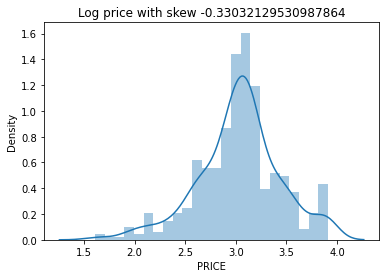

In [ ]:
sns.distplot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

Посмотрим, помогло ли логарифмирование нашей модели.

In [ ]:
prices=np.log(data['PRICE'])
features=data.drop('PRICE', axis=1)
X_train, X_test,y_train,y_test=train_test_split(features,prices,test_size=0.2,random_state=2)

In [ ]:
regr=LinearRegression()
regr.fit(X_train, y_train)
print('Training data R^2:', regr.score(X_train, y_train))
print('Testing data R^2:', regr.score(X_test, y_test))
print('Intercept:', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data R^2: 0.7812284078007615
Testing data R^2: 0.8134984915947434
Intercept: 4.0762663886895805


,coef
CRIM,-0.009760
ZN,0.000958
INDUS,0.001521
CHAS,0.109434
NOX,-0.685007
RM,0.086988
AGE,0.000310
DIS,-0.045717
RAD,0.014988
TAX,-0.000635


Точность возросла, коэффициенты уменьшились.

**Чистка лишних данных**

p-value - значение статистической важности


In [ ]:
x_inc_const=sm.add_constant(X_train)
model=sm.OLS(y_train, x_inc_const)
results=model.fit()
pd.DataFrame({'coef' : results.params, 'p-value' : round(results.pvalues, 3)})

,coef,p-value
const,4.076266,0.000
CRIM,-0.009760,0.000
ZN,0.000958,0.138
INDUS,0.001521,0.569
CHAS,0.109434,0.005
NOX,-0.685007,0.000
RM,0.086988,0.000
AGE,0.000310,0.599
DIS,-0.045717,0.000
RAD,0.014988,0.000


Чем меньше p-value, тем лучше. У столбцов "INDUS" и "AGE" очень высокоезначение.

VIF - мультиколлинеарность

vif показывает насколько параметр зависит от других параметров.

In [ ]:
variance_inflation_factor(exog=x_inc_const.values, exog_idx=1)

1.6604130948615847

Нужно, чтобы vif был меньше 5-10.

In [ ]:
vif= [variance_inflation_factor(exog=x_inc_const.values, exog_idx=i
                                ) for i in range(x_inc_const.shape[1])]
pd.DataFrame({'coef name' : x_inc_const.columns, 'vif' : np.around(vif, 2)})

,coef name,vif
0,const,581.76
1,CRIM,1.66
2,ZN,2.15
3,CHAS,1.07
4,NOX,3.77
5,RM,1.73
6,DIS,3.36
7,RAD,6.31
8,TAX,6.62
9,PTRATIO,1.73


**Упростим модель с BIC.**

Bayesian Information Criterion.
Показывает, насколько наша модель простая.
Чем меньше, тем лучше.

In [ ]:
x_inc_const=sm.add_constant(X_train)
model=sm.OLS(y_train, x_inc_const)
results=model.fit()
org_coef=pd.DataFrame({'coef' : results.params, 'p-value' : round(results.pvalues, 3)})
print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -117.15661936836581
r-squared is 0.7812284078007616


Удалим столбец "INDUS".

In [ ]:
x_inc_const=sm.add_constant(X_train)
x_inc_const=x_inc_const.drop(['INDUS'], axis=1)
model=sm.OLS(y_train, x_inc_const)
results=model.fit()
coef_minus_indus=pd.DataFrame({'coef' : results.params, 'p-value' : round(results.pvalues, 3)})
print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -122.82100380976571
r-squared is 0.7810458250063863


Параметр BIC стал меньше, а точность не изменилась. Этого мы и добивались.

Удалим еще и столбец "AGE".

In [ ]:
x_inc_const=sm.add_constant(X_train)
x_inc_const=x_inc_const.drop(['INDUS', 'AGE'], axis=1)
model=sm.OLS(y_train, x_inc_const)
results=model.fit()
reduced_coef=pd.DataFrame({'coef' : results.params, 'p-value' : round(results.pvalues, 3)})
print('BIC is', results.bic)
print('r-squared is', results.rsquared)

Параметр BIC стал меньше, а точность не изменилась. 

Сравним две наши модели.

In [ ]:
frames=[org_coef, reduced_coef]
pd.concat(frames, axis=1)

,coef,p-value,coef,p-value
const,4.076266,0.000,4.060458,0.000
CRIM,-0.009760,0.000,-0.009806,0.000
ZN,0.000958,0.138,0.000886,0.165
INDUS,0.001521,0.569,NaN,NaN
CHAS,0.109434,0.005,0.113062,0.003
NOX,-0.685007,0.000,-0.636105,0.000
RM,0.086988,0.000,0.087914,0.000
AGE,0.000310,0.599,NaN,NaN
DIS,-0.045717,0.000,-0.048164,0.000
RAD,0.014988,0.000,0.014455,0.000


Коээффициенты не сильно отличаются друг от друга. Это значит, что эти параметры не влияли на итоговый результат.

**Residuals. (Для интервалов).**

СКО: Возводим в квадрат каждую ошибку, которую модель допустила, суммируем их и делим на их количество.

В наших ошибках не должно быть закономерности, ошибки должны быть случайны.


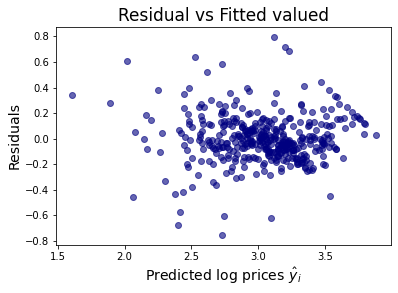

In [ ]:
prices = np.log(data['PRICE'])
features=data.drop(['PRICE','INDUS','AGE'], axis=1)
X_train, X_test,y_train,y_test=train_test_split(features,prices,test_size=0.2,random_state=2)
x_inc_const=sm.add_constant(X_train)
model=sm.OLS(y_train, x_inc_const)
results=model.fit()

plt.scatter(x=results.fittedvalues,y=results.resid, c='navy', alpha=0.6)
plt.title('Residual vs Fitted valued', fontsize=17)
plt.xlabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


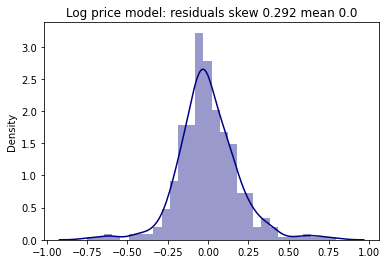

In [ ]:
resid_mean=round(results.resid.mean(),3)
resid_skew=round(results.resid.skew(),3)
sns.distplot(results.resid, color='navy')
plt.title(f'Log price model: residuals skew {resid_skew} mean {resid_mean}')
plt.show()

Ошибки подчиняются закону нормального распределения.


**Интервалы**


Получаем интервалы предсказанных значений и точность для них.

Возьмем среднее значение и отступим в обе стороны по 2 СКО: в этот интервал попадет 95% значений из датасета.

In [ ]:
reduced_log_mse=round(results.mse_resid,3)
print('2 MSE log', 2*np.sqrt(reduced_log_mse))
upper_bound=np.log(30)+2*np.sqrt(reduced_log_mse)
print('The upper bound in normal price is $', np.e**upper_bound*1000)
lower_bound=np.log(30)-2*np.sqrt(reduced_log_mse)
print('The lower bound in normal price is $', np.e**lower_bound*1000)

2 MSE log 0.3847076812334269
The upper bound in normal price is $ 44075.543651361266
The lower bound in normal price is $ 20419.48721311356
